In [1]:
%load_ext autoreload
%autoreload 2

In [15]:
from typing import Dict, List

import numpy as np
import pandas as pd
import plotly.plotly as py
import plotly.offline as offline
import plotly.graph_objs as go
import seaborn as sns

In [3]:
import modules.database
import modules.analyzer
import modules.settings as settings

In [4]:
py.sign_in(settings.PLOTLY_USERNAME, settings.PLOTLY_PASSWORD)
offline.init_notebook_mode(connected=True)
def generate_experiment_settings(list_count_experiments: List[int]) -> pd.DataFrame:
    starting_count = 0
    final_dataframe = pd.DataFrame()
    for experiment_id, count in enumerate(list_count_experiments):
        final_dataframe = final_dataframe.append(modules.analyzer.Analyzer.expand_grid({
            'experiment_id': [experiment_id + 1],
            'settings_id': list(range(starting_count + 1, starting_count + count + 1))
        }))
        starting_count += count
    return final_dataframe

In [5]:
settings = modules.database.execute_query('select * from settings;')
responses = modules.database.execute_query('select * from response;')
dataframe_experiments = generate_experiment_settings([10, 3, 108, 3, 2, 10, 10, 200, 100, 2])

In [6]:
experiment_response: Dict[int, pd.DataFrame] = {}
for experiment_id in set(dataframe_experiments['experiment_id']):
    settings_ids = dataframe_experiments[dataframe_experiments['experiment_id'] == experiment_id]['settings_id'].values.tolist()
    experiment_responses = responses[responses['settings_id'].isin(settings_ids)].groupby('settings_id').mean().reset_index()
    experiment_response[experiment_id] = experiment_responses.merge(settings, left_on = 'settings_id', right_on = 'id')

In [7]:
def Barplot(dataframe: pd.DataFrame, x_axis: str, y_axis: str, x_name: str, y_name: str, file_name: str) -> None:
    min_value, max_value = min(dataframe[y_axis]), max(dataframe[y_axis])
    data = go.Bar(
            y = dataframe[y_axis],
            x = dataframe[x_axis],
    )
    fig = go.Figure(
        data = [data],
        layout = go.Layout(
            width = 600,
            height = 600,
            xaxis = dict(
                title = x_name,
                type = 'category'
            ),
            yaxis = dict(
                title = y_name,
                range = [min_value * 0.9, max_value* 1.1]
            ),
        )
    )
    py.image.save_as(fig, filename = file_name)

In [15]:
Barplot(
    dataframe = experiment_response[1],
    x_axis = 'zero_intelligence_shading_max',
    y_axis = 'zero_intelligence_surplus',
    x_name = 'ZI Traders Max Shading',
    y_name = 'ZI Traders Surplus',
    file_name = 'zero_intelligence_shading_to_surplus.png'
)

In [16]:
Barplot(
    dataframe = experiment_response[1],
    x_axis = 'zero_intelligence_shading_max',
    y_axis = 'bid_ask_spread_mean',
    x_name = 'ZI Traders Max Shading',
    y_name = 'Bid/Ask Spread',
    file_name = 'zero_intelligence_shading_to_bidask_spread.png'
)

In [17]:
Barplot(
    dataframe = experiment_response[1],
    x_axis = 'zero_intelligence_shading_max',
    y_axis = 'number_trades',
    x_name = 'ZI Traders Max Shading',
    y_name = 'Number of Trades',
    file_name = 'zero_intelligence_shading_to_number_trades.png'
)

In [18]:
Barplot(
    dataframe = experiment_response[1],
    x_axis = 'zero_intelligence_shading_max',
    y_axis = 'price_volatility',
    x_name = 'ZI Traders Max Shading',
    y_name = 'Price volatility',
    file_name = 'zero_intelligence_shading_to_volatility.png'
)

In [8]:
############### 2 #################
Barplot(
    dataframe = experiment_response[2],
    x_axis = 'market_maker_count',
    y_axis = 'zero_intelligence_surplus',
    x_name = 'Market Makers Count',
    y_name = 'ZI Traders Surplus',
    file_name = 'market_maker_count_to_zero_intelligence_surplus.png'
)

In [9]:
Barplot(
    dataframe = experiment_response[2],
    x_axis = 'market_maker_count',
    y_axis = 'marketmaker_surplus',
    x_name = 'Market Makers Count',
    y_name = 'Market Makers Surplus',
    file_name = 'market_maker_count_to_marketmaker_surplus.png'
)

In [11]:
Barplot(
    dataframe = experiment_response[2],
    x_axis = 'market_maker_count',
    y_axis = 'number_trades',
    x_name = 'Market Makers Count',
    y_name = 'Number of Trades',
    file_name = 'market_maker_count_to_number_trades.png'
)

In [12]:
Barplot(
    dataframe = experiment_response[2],
    x_axis = 'market_maker_count',
    y_axis = 'bid_ask_spread_mean',
    x_name = 'Market Makers Count',
    y_name = 'Bid/Ask spread',
    file_name = 'market_maker_count_to_bidask_spread.png'
)

In [33]:
########################## 4 ##########################
Barplot(
    dataframe = experiment_response[4],
    x_axis = 'session_length',
    y_axis = 'zero_intelligence_surplus',
    x_name = 'Session Length',
    y_name = 'ZI Traders Surplus',
    file_name = 'session_length_to_zero_intelligence_surplus.png'
)

In [34]:
Barplot(
    dataframe = experiment_response[4],
    x_axis = 'session_length',
    y_axis = 'marketmaker_surplus',
    x_name = 'Session Length',
    y_name = 'Market Makers Surplus',
    file_name = 'session_length_to_marketmaker_surplus.png'
)

In [35]:
Barplot(
    dataframe = experiment_response[4],
    x_axis = 'session_length',
    y_axis = 'number_trades',
    x_name = 'Session Length',
    y_name = 'Number of Trades',
    file_name = 'session_length_to_number_trades.png'
)

In [36]:
Barplot(
    dataframe = experiment_response[4],
    x_axis = 'session_length',
    y_axis = 'bid_ask_spread_mean',
    x_name = 'Session Length',
    y_name = 'Bid/Ask Spread',
    file_name = 'session_length_to_bidask_spread.png'
)

In [39]:
####################### arbitrageur_presence_no_arbitrage #######################
Barplot(
    dataframe = experiment_response[5],
    x_axis = 'include_arbitrageur',
    y_axis = 'zero_intelligence_surplus',
    x_name = 'Arbitrageur is Included',
    y_name = 'ZI Traders Surplus',
    file_name = 'include_arbitrageur_to_zero_intelligence_surplus.png'
)
Barplot(
    dataframe = experiment_response[5],
    x_axis = 'include_arbitrageur',
    y_axis = 'arbitrageur_profit',
    x_name = 'Arbitrageur is Included',
    y_name = 'Arbitrageur Profit',
    file_name = 'arbitrageur_profit_to_zero_intelligence_surplus.png'
)

In [44]:
####################### lagged_nbbo_without_arbitrageur #######################
Barplot(
    dataframe = experiment_response[6],
    x_axis = 'national_best_bid_and_offer_delay',
    y_axis = 'zero_intelligence_surplus',
    x_name = 'NBBO Delay',
    y_name = 'ZI Traders Surplus',
    file_name = 'nbbo_delay_to_zero_intelligence_surplus.png'
)
Barplot(
    dataframe = experiment_response[6],
    x_axis = 'national_best_bid_and_offer_delay',
    y_axis = 'marketmaker_surplus',
    x_name = 'NBBO Delay',
    y_name = 'Market Maker Surplus',
    file_name = 'nbbo_delay_to_marketmaker_surplus.png'
)
Barplot(
    dataframe = experiment_response[6],
    x_axis = 'national_best_bid_and_offer_delay',
    y_axis = 'number_trades',
    x_name = 'NBBO Delay',
    y_name = 'Number of Trades',
    file_name = 'nbbo_delay_to_number_trades.png'
)
Barplot(
    dataframe = experiment_response[6],
    x_axis = 'national_best_bid_and_offer_delay',
    y_axis = 'mean_execution_time',
    x_name = 'NBBO Delay',
    y_name = 'Mean Execution Time',
    file_name = 'nbbo_delay_to_mean_execution_time.png'
)

In [45]:
####################### batch_auction_without_lag #######################
Barplot(
    dataframe = experiment_response[7],
    x_axis = 'batch_auction_length',
    y_axis = 'zero_intelligence_surplus',
    x_name = 'Batch auction length',
    y_name = 'ZI Traders Surplus',
    file_name = 'batch_auction_length_to_zero_intelligence_surplus.png'
)
Barplot(
    dataframe = experiment_response[7],
    x_axis = 'batch_auction_length',
    y_axis = 'marketmaker_surplus',
    x_name = 'Batch auction length',
    y_name = 'Market Maker Surplus',
    file_name = 'batch_auction_length_to_marketmaker_surplus.png'
)
Barplot(
    dataframe = experiment_response[7],
    x_axis = 'batch_auction_length',
    y_axis = 'number_trades',
    x_name = 'Batch auction length',
    y_name = 'Number of Trades',
    file_name = 'batch_auction_length_to_number_trades.png'
)
Barplot(
    dataframe = experiment_response[7],
    x_axis = 'batch_auction_length',
    y_axis = 'mean_execution_time',
    x_name = 'Batch auction length',
    y_name = 'Mean Execution Time',
    file_name = 'batch_auction_length_to_mean_execution_time.png'
)

national_best_bid_and_offer_delay           0             100           200  \
batch_auction_length                                                          
0                                  1.721216e+06  1.370341e+06  1.357281e+06   
100                                8.829759e+05  7.756233e+05  7.120039e+05   
200                                3.304327e+05  3.387198e+05  2.627406e+05   
300                                7.995271e+04  8.701385e+04  3.006965e+04   
400                               -8.433475e+03 -3.006098e+04 -3.541631e+04   
500                               -3.672874e+04 -7.733972e+04 -8.334017e+04   
600                               -4.474855e+04 -9.955902e+04 -8.748977e+04   
700                               -4.356488e+04 -1.086461e+05 -1.124583e+05   
800                               -3.569671e+04 -1.078861e+05 -1.069771e+05   
900                               -3.793870e+04 -1.076362e+05 -1.018069e+05   

national_best_bid_and_offer_delay           300    

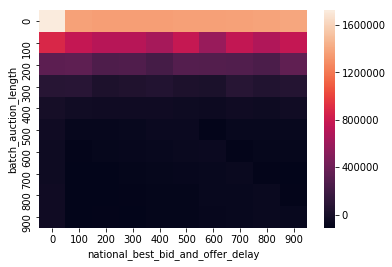

In [65]:
####################### batch_auction_with_lag #######################
data = experiment_response[8]
data = data[data.include_arbitrageur]

pivot_table = pd.pivot_table(
    data,
    values = 'zero_intelligence_surplus',
    index = 'batch_auction_length',
    columns  = 'national_best_bid_and_offer_delay'
)
print(pivot_table)
sns.heatmap(pivot_table)

national_best_bid_and_offer_delay           0             100           200  \
batch_auction_length                                                          
0                                  1.732583e+06  1.562375e+06  1.425584e+06   
100                                8.824900e+05  8.286533e+05  7.666579e+05   
200                                3.409010e+05  3.554787e+05  2.874050e+05   
300                                9.213017e+04  9.763563e+04  5.453033e+04   
400                               -1.136260e+04 -2.991064e+04 -2.741116e+04   
500                               -4.293928e+04 -7.582616e+04 -7.066186e+04   
600                               -4.103550e+04 -1.083180e+05 -7.643703e+04   
700                               -4.092608e+04 -1.090943e+05 -1.067227e+05   
800                               -4.644746e+04 -1.026752e+05 -1.105788e+05   
900                               -3.557163e+04 -9.426668e+04 -1.048092e+05   

national_best_bid_and_offer_delay           300    

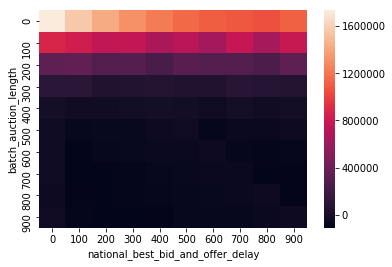

In [66]:
data = experiment_response[8]
data = data[~data.include_arbitrageur]

pivot_table = pd.pivot_table(
    data,
    values = 'zero_intelligence_surplus',
    index = 'batch_auction_length',
    columns  = 'national_best_bid_and_offer_delay'
)
print(pivot_table)
sns.heatmap(pivot_table)